<a href="https://colab.research.google.com/github/waleedGeorgy/deep-learning/blob/main/TensorFlow_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction and Data Preparation

**Classification** is a supervised machine learning technique where the model tries to predict the correct qualitative label of a given input data. Classification can be **binary** (where a datapoint is classified into one of two classes), **multi-class** (where a datapoint is classified into one of $n$ classes) or **multilabel** classification (where a data point can be classified into multiple classes), and the ultimate goal is to correctly classify each data entry into the correct class using its features.

Example of classification problems: spam vs. ham emails (binary classification), animal species (multiclass classification), text tagging (multilabel classification).

In [ ]:
import tensorflow as tf

tf.__version__

'2.15.0'

In [ ]:
# For starters we'll perform classification on a simple example
# We'll use the make_circles dataset from sklearn
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000, # Generate 1000 datapoints
                    noise = 0.03, # Add variation to data using Gaussian distribution
                    random_state = 42)

X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

Features X are the coordinates of the datapoints and the label y is the class of the datapoints (either 0 or 1), hence this is a binary classification problem. The goal is, using the existing data, we want to create a model that will be able to accurately classify new datapoints into either class 0 or class 1.

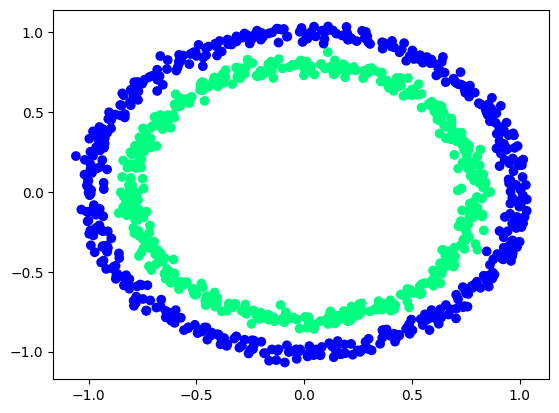

In [ ]:
# Following the guidlines of model evaluation, let's first plot the data to get a general sense of what are we working with
import matplotlib.pyplot as plt
plt.scatter(X[:,0], # The x-axis will contain the x coordinates of all the data points
            X[:,1], # The y-axis will contain the y coordinates of all the data points
            c = y, # Coloring data points based off their label y
            cmap = 'winter'); # The color palette

By looking at the plot, our goal is to build a model that can accurately seperate the green dots (class 1) from the blue ones (class 0).

In [ ]:
# Checking the data to determine the input and output shapes
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X[0].shape, y[0].shape

((2,), ())

The model we're going to build will take the coordinates of a data point, and using them, try to classify it into either class 0 or class 1.
The input is a vector of size (2,), while the output is a single scalar (the class of a datapoint).

#Building a Basic TensorFlow Classification Model

For starters, we'll build a very basic classification model consisting of one dense layer with 1 neuron, and fit it for 10 epochs.

**Note:** as with any other ML / DL problem, we must perform cross-validation, but since we're working with a toy dataset we can skip this step.

As with the case of regression problems, we need some way to quantify how wrong our classification model is during the fitting phase.

Classification has it own set of loss functions. The most common of them are:

1.   **Cross Entropy Loss / Log loss** - the most common loss function used in classification problems. It measures the performance of a classification model whose predicted output is a probability value between 0 and 1. When the classification problem is binary, `.BinaryCrossentropy()` is used:
$logloss=-\frac{1}{N} \sum_{i=1}^N\left(y_i \cdot \log \left(\hat{y}_i\right)+\left(1-y_i\right) \cdot \log \left(1-\hat{y}_i\right)\right)$

  and for multiclass classification `.CategoricalCrossEntropy()` is used:
$logloss=-\frac{1}{N} \sum_{i=1}^N y_i \cdot \log \left(\hat{y}_i\right)$

2.   **Hinge Loss** - The second most common loss function for classification problems and an alternative to the cross-entropy loss function. It was primarily developed for support vector machine (SVM) model evaluation. Can be accessed used with `.Hinge()`
$hingeloss=\max (0,1-y * f(x))$

In [ ]:
# Building the first model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy']) # Accuracy will be used as a metric, classification evaluation metrics will be discussed later

model_1.fit(X, y, epochs = 10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 4.2906 - accuracy: 0.4680
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 4.2370 - accuracy: 0.4710
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 4.1903 - accuracy: 0.4720
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 4.1825 - accuracy: 0.4710
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 4.1457 - accuracy: 0.4700
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 4.0897 - accuracy: 0.4680
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 4.0403 - accuracy: 0.4680
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 3.9956 - accuracy: 0.4700
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 3.9659 - accuracy: 0.4710
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 3.9278 - accuracy: 0.4740


Even with such a small model we achieved an accuracy of 48.5%, but alas this is not a good result, because since we are working with a binary classification problem, a model with ~50% accuracy is simply guessing to which class should a datapoint be assigned to.

Since the results are unsatisfactory, we'll try to improve our model by following the model improvement guidelines and add more hidden layers, more neurons in each hidden layer and/or train for longer.

In [ ]:
# Building an improved model and training for longer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), # New hidden layer with 10 units
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_2.fit(X, y, epochs = 100) # training for 100 epochs instead of 10

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.8047 - accuracy: 0.4710
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5003 - accuracy: 0.4680
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3341 - accuracy: 0.4720
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1823 - accuracy: 0.4710
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9721 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6630 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 2.5397 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7853 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7102 - accuracy: 0.4710
Epoch 11/

No improvement at all, and the model is still classifying data randomly.

#Introducing Non-Linearity

So what could be the problem with the previous models? Since they consist of only linear dense layers $y = mX + p$, the question arises, are straight lines (linear decision boundaries) enough to seperate the two circular clusters of datapoints we're working with? The answer is **no**.

For cases like these, **non-linearity** must be implemented.

The **non-linearity** property means that we're modeling a complex, non-linear relationship between features and labels, and in deep learning it can be introduced through **activation functions**.

Non-linearity is a **very important concept**, since almost every real-world neural networks can't functions without it, simply due to the fact that generally, the relationship between data is not linear.

**Activation functions** are functions that modify the behaviour of the outputs of the hidden layers (the sum of the weighted input data of the neuron + bias of the neuron) and add a non-linear property to them. Some of the most popular activation functions are: **ReLU** (Recitfied Linear Unit), **Sigmoid**, **Tanh** (Hyperbolic Tangent), **Softmax**, etc...

In [ ]:
# Creating a model with non-linear activation functions
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'), # added a ReLU activation function to the hidden layer
    tf.keras.layers.Dense(5, activation = 'relu'), # added another layer with ReLU activation function
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

Strangely enough, even with non-linear activation functions, our model still operates by guessing. What else could be missing?

If we look at our output layer, it is only outputting a single value that is supposed to represent the class of the datapoint, but what does the model actually outputs? Let's check that out by predicting on the very first datapoint from the circles dataset.

In [ ]:
# using model_3 to predict the class of the first datapoint
model_3.predict(tf.expand_dims([0.75424625, 0.23148074], axis = 0))

1/1 [==============================] - 0s 106ms/step


array([[1.2111056]], dtype=float32)

We get an output of -0.08. What does it represent in the context of belonging to a class? The answer is **nothing**, becuase the model outputs a raw logit (raw model output) that does not represent anything. So how do we modify our classification model so that it ouputs a value that can be interpreted? The answer is **activation functions** again.

Output layers need their own activation functions to output interpretable result, and without them neither the model can be trained (since the loss function needs those interpretable outputs to quantify how wrong our model is), nor the user can get any useful information from the model.

In binary classification, in order to turn output logits into prediction probabilities, we use the `sigmoid` activation function. As for multiclass classification we typically use the `softmax` activation function.

Using a suitable activation function for the ouput layer for any kind of application is of utmost importance and is a standard practice regarding any neural network.

In [ ]:
# Creating a model with an activation function on the ouput layer
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # added a sigmoid activation function on the output layer
])

model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.4990
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.5150
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5210
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5110
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5080
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6832 - accuracy: 0.5150
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5220
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5220
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6793 - accuracy: 0.5340
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.5280
Epoch 11/

And just like that we managed to train a perfect model with **100% accuracy** with a very small loss of 0.03!

In [ ]:
# Using the model we've got, let's predict the class of the very first datpoint from the dataset
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [ ]:
# To get the prediction label for binary classification we need to round the prediction probability (more details below)
tf.math.round(model_4.predict(tf.expand_dims([0.75424625, 0.23148074], axis = 0))).numpy()

1/1 [==============================] - 0s 197ms/step


array([[1.]], dtype=float32)

Our model predicted that this datapoint belongs to class 1 which is correct!

To recap:

*   **Output Logits** - raw model outputs. Uninterpretable to neither the model nor the human.
*   **Prediction Probabilities** - The probability of belonging to a class in a classification problem. Obtained through using activation functions on output layers.
* **Prediction Labels** - The actual predicted class of the input. In binary classification we **round** the probability with a default threshold of 50% (an output with a prediction probability >= 50% will belong to class 1, while any output with a prediction probability < 50% will belong to class 0, this is why the above point was rounded to 1 and the predicted class is class 1).

  for multiclass classification the index of the ouput with the highest probabily represents the class that a datapoint belongs to. It can be obtained using `argmax` (e.g. the softmaxed output is $[0.11, 0.37, 0.52]$, by applying argmax we get that the highest probability is at index 2, which means that the datapoint belongs to class 2).



Text(0.5, 0, 'Epochs')

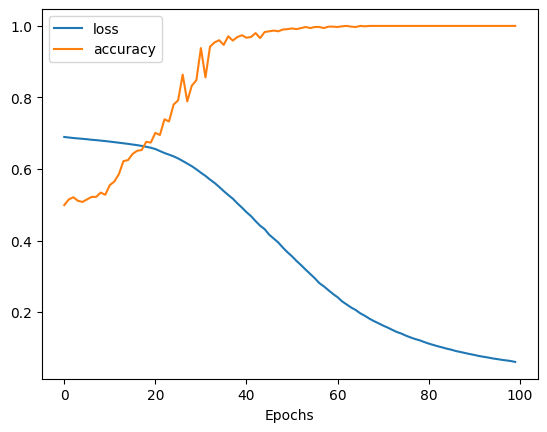

In [ ]:
# Plotting model's train loss and train accuracy
import pandas as pd

pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')

#Evaluating Classification Models

As with regression models, there is a wide range of evaluation metrics for classification models. Some of them are:

1.   **Confusion Matrix** - plots the true positives (TP), true negatives (TN), false positives (FP) and false negatives (FN) of the model.
2.   **Classification Report** - contains the accuracy, precision, recall, f1-score of the model.
  *   **Accuracy** shows how often the model is correct overall. Not the best for the case of imbalanced classes, since the accuracy paradox can occur. $accuracy=\frac{T P+T N}{T P+T N+F P+F N}$
  *   **Precision** measures how often a machine learning model correctly predicts the positive class. Precision answers the question: how often the positive predictions are correct? Higher precision leads to less false positives.
 $precision=\frac{{TP}}{{TP + FP}}$
  * **Recall (Sensitivity)** measures how often a model correctly identifies positive instances (true positives) from all the actual positive samples in the dataset. Recall answers the question: can the model find all instances of the positive class? Higher recall results in less false negatives. $recall=\frac{{TP}}{{TP + FN}}$
  * **f1-score** is an important metric that calculates the harmonic mean of recall and precision. Since there is always a trade-off between the two, maximizing the f1-score, means maximizing both of these metrics.

3. **ROC Curve and AUC** - **ROC Curve** (Receiver Operator Characteristics Curve) plots TPs against FPs of a classification model and shows the performance of a said model at all classification thresholds. Visually, the closer the resulting curve is to the left top corner, the better the performance is. **AUC** (Area Under the Curve) calculates the area that is under the ROC curve, and the bigger the area the better the model is. It can be used to compare the performance of different models for predicting the same outcome.



In [ ]:
# Before we procede with evaluating the new model, let's split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), len(X_test)

(800, 200)

In [ ]:
# Recreating the well-performing model_4 from above
# Only this time we will train on the train data
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 10, activation = 'relu'),
    tf.keras.layers.Dense(units = 5, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

# We're going to increase the learning rate which controls the size of the step of the optimizer
# Since the previous model started learning slowly, increasing the learning rate can be a good idea for faster covergence
model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ['accuracy'])

# Since we increased the learning_rate tenfold we're reduce the number of epochs to 25
history = model_5.fit(X_train, y_train, epochs = 25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6785 - accuracy: 0.5825
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6587
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.7437
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7837
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.8050
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.8825
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.9688
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2851 - accuracy: 0.9925
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2192 - accuracy: 0.9937
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.9962
Epoch 11/25
25/25 [

The model achieved the same accuracy as the previous model 4 times faster, and it is all thanks to the tweak we made to the learning rate.

**Learning rate** is a very important hyperparameter in deep learning, and modifying its default value can at times lead to great results.

Simply put, the **learning rate** is a tuning parameter (hyperparameter) in an optimization algorithm that determines the step size at each iteration while moving towards a minimum (global or local) of a loss function.

In [ ]:
# Let's evaluate model_5 on the test data
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9950


[0.05946933850646019, 0.9950000047683716]

Great! It seems that our model performs equally good on unseen data, which means that the model is effiecent and we do not have any overfitting or underfitting to the data.

In [ ]:
# Turning the history for model_5 into a dataframe
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy
0,0.678461,0.58250
1,0.659807,0.65875
2,0.632840,0.74375
3,0.592227,0.78375
4,0.533784,0.80500
5,0.474850,0.88250
6,0.367318,0.96875
7,0.285148,0.99250
8,0.219202,0.99375
9,0.177708,0.99625


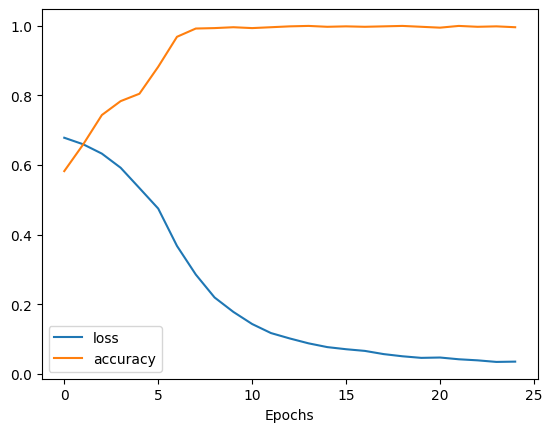

In [ ]:
# plotting the train loss and accuracy curves for model_5
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.xlabel('Epochs');

In [ ]:
# Now let us plot some classification evaluation metrics
# For them, we need to make predictions on the test data using the model we trained
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_5.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
# We need to expand y_test so that it matches the shape of y_pred (200,1)
# We're also rounding the prediction probabilities to get prediction labels
print(classification_report(tf.expand_dims(y_test, axis = -1), tf.math.round(y_pred)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.99      1.00      1.00       100

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
# Creating a confusion matrix
cm = confusion_matrix(tf.expand_dims(y_test, axis = -1), tf.math.round(y_pred))
print(cm)

[[ 99   1]
 [  0 100]]


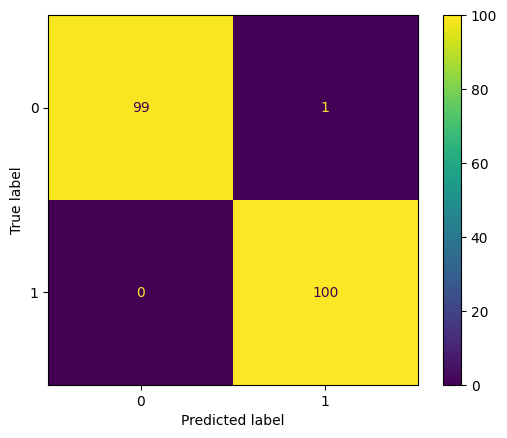

In [ ]:
# Plotting the confusion matrix
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

As expected we got nearly prefect classification metrics, and consequently the confusion matrix has only one missclassified instance (top right).

#Finding the Ideal Learning Rate

As was mentioned previously, learning rate  is one of the most important hyperparameters that we can adjust. So, is there a way to find the ideal learning rate for the model we're training? Yes, there is!

Finding the ideal learning rate can be done by defining a learning rate scheduler using **TensorFlow Callbacks**. **Callbacks** are special, additional utilities or functions that can be added to the model during different stages of the deep learning process (for example, during `fit()`, `evaluate()`, or `predict()`). Callbacks can help you prevent overfitting, visualize training progress, debug your code, save checkpoints, generate logs, create a TensorBoard, etc.

In [ ]:
# Adding a learning rate scheduler to the previous well-preforming model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 10, activation = 'relu'),
    tf.keras.layers.Dense(units = 5, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Creating the scheduler
# For the schedule we pass a lambda function that takes in the cureent epoch
# And for each epoch increases the default learning rate of 0.001 by 10^(epoch/20)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(schedule = lambda epoch: 1e-4 * 10**(epoch/20))

history = model.fit(X_train,
                      y_train,
                      epochs = 100,
                      callbacks = [lr_scheduler]) # Adding the schedular to the fitting procedure

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6918 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5063 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5063 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.5075 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5088 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5075 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5100 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

Text(0.5, 0, 'Epochs')

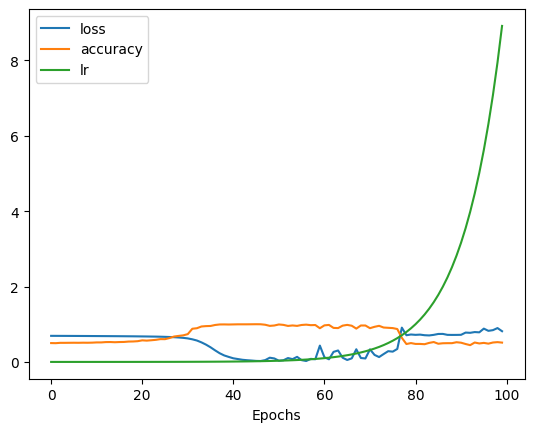

In [ ]:
# Checking the resulting curves
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')

How do we find the ideal learning rate value is? It can be found visually by applying the knee method. We can see that the loss decreases the most (and the accuracy increases the most) at around the 30-40 epochs range, and the ideal learning rate is generally in the small range following that, so around epochs 40-45 in our case.

Let's find out what the value of the learning rate was at epochs 40-45.

In [ ]:
# Turning model's histroy into a dataframe and showing only the 35-45 epochs
model_histroy = pd.DataFrame(history.history)
model_histroy[35:45]

,loss,accuracy,lr
35,0.388071,0.95375,0.005623
36,0.306533,0.98000,0.006310
37,0.230571,0.99375,0.007079
38,0.171830,0.99500,0.007943
39,0.132518,0.99250,0.008913
40,0.096089,0.99500,0.010000
41,0.076435,0.99750,0.011220
42,0.056902,0.99750,0.012589
43,0.045534,0.99750,0.014125
44,0.036843,0.99875,0.015849


As we can see, the learning rate in the range 40-45 was ~0.01, which means that this is the ideal learning rate in our case.

We can perform what we've done before in a differt way.

We can plot the learning rate vs. loss and check the resulting plot.

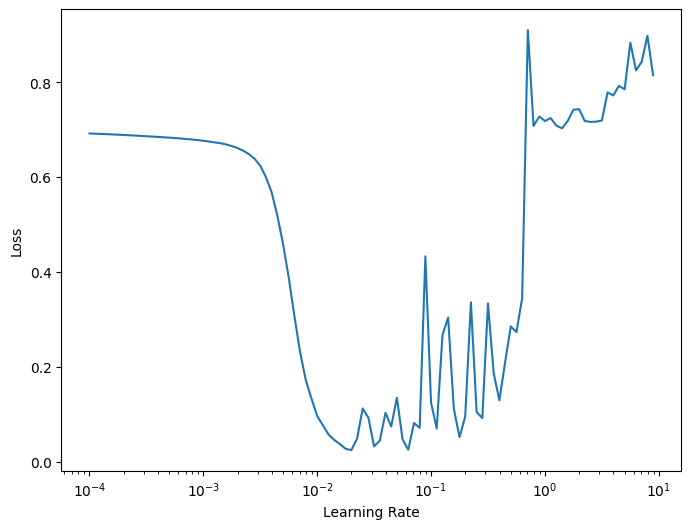

In [ ]:
# Plotting learning rate vs. loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize = (8,6))
plt.semilogx(lrs, history.history['loss']) # using the log scaler so that the x and y values are in the same range
plt.xlabel('Learning Rate')
plt.ylabel('Loss');

As we can see, the loss decreases the most at around 1e-2, and the ideal learning rate is the point with the smallest loss near the 1e-2 tick, and that is our ideal learning rate.

Generally, the default learning rate value is a very good choice.

Other widely used (and well-performing values) are: `[1, 0.1, 0.01, 0.001, 0.0001]`.

#TensorFlow Multiclass Classification on a Real-world Dataset

Now, we'll apply what we've learned about classification to a real-world multiclass classification problem.

We'll be working with the [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which consists of 70 thousand grayscale photos of various labeled clothing items.

Our goal is to build a model that can accurately (as accurately as possible) predict the correct label of each clothing image. Model's inputs will be the grayscale images of the FashionMNIST dataset. Model's outputs will be said images' labels.

In [36]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is already split into train and test sets for us (60k train, 10k test)
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [38]:
# Showing the first training image and label
train_data[0], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [39]:
# Checking the shape of the first entry
# Each sample is a 28x28 image
# Labels are scalar values representing the class of the clothing item
train_data[0].shape, train_labels[0].shape

((28, 28), ())

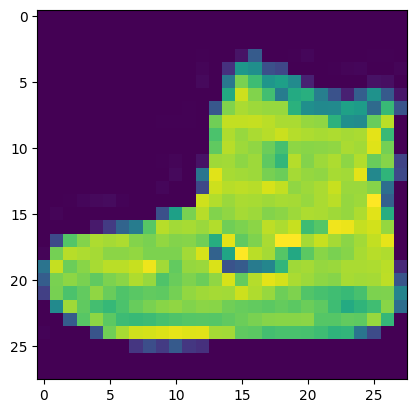

In [41]:
# Visualizing the first clothing item
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

The numerical labels and what clothing item they correspond to:

*   0	T-shirt/top
*   1	Trouser
*   2	Pullover
*   3	Dress
*   4	Coat
*   5	Sandal
*   6	Shirt
*   7	Sneaker
*   8	Bag
*   9	Ankle boot

The entry we visualized earlier has the label of 9 which is an ankle boot.

In [43]:
# Since out labels our numerical, it is better to turn them into a form that anyone can easily understand
# We'll store the class names in a list. The order of the items must be respected
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [45]:
# We're dealing with 10 classes
len(class_names)

10

In [46]:
# Indexing on the list we've just created
class_names[train_labels[0]]

'Ankle boot'

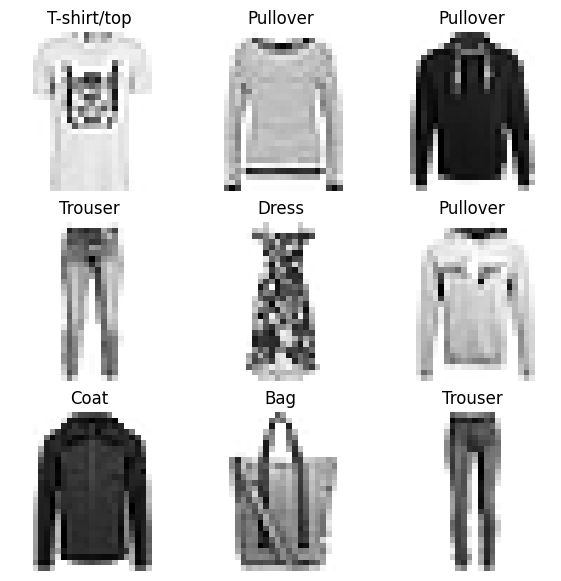

In [49]:
# To get more familiar with the data, let's plot multiple images
import random

plt.figure(figsize = (7,7))
for i in range(9):
  plt.subplot(3, 3, i+1)
  random_idx = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_idx], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[random_idx]])
  plt.axis(False)